In [31]:

import random
import math
import matplotlib.pyplot as plt

#震中距函数
def cal_dis(lat1, lon1,lat2, lon2):
    latitude1 = (math.pi/180)*lat1
    latitude2 = (math.pi/180)*lat2
    longitude1 = (math.pi/180)*lon1
    longitude2= (math.pi/180)*lon2
    #因此AB两点的球面距离为:{arccos[sinb*siny+cosb*cosy*cos(a-x)]}*R
    #地球半径
    if((lat1-lat2)**2+(lon1-lon2)**2<0.0001):
        return 0

    d = math.acos(math.sin(latitude1)*math.sin(latitude2)+ math.cos(latitude1)*math.cos(latitude2)*math.cos(longitude2-longitude1))/math.pi*180.0
    return d

#方位角函数
def cal_azimuth(lat1, lon1, lat2, lon2):
    lat1_rad = lat1 * math.pi / 180
    lon1_rad = lon1 * math.pi / 180
    lat2_rad = lat2 * math.pi / 180
    lon2_rad = lon2 * math.pi / 180
   
    y = math.sin(lon2_rad - lon1_rad) * math.cos(lat2_rad)
    x = math.cos(lat1_rad) * math.sin(lat2_rad) - math.sin(lat1_rad) * math.cos(lat2_rad) * math.cos(lon2_rad - lon1_rad)
    brng = math.atan2(y, x) * 180 / math.pi
    if((lat1-lat2)**2+(lon1-lon2)**2<0.0001):
        return 0
    return float((brng + 360.0) % 360.0)



# 研究区域范围
dep1 = 0; dep2 = 800; 
lat1 = -1.0; lat2 =  1.0; 
lon1 = 110.0; lon2 = 130.0; 
clat = (lat1+lat2)/2.0; 
clon = (lon1+lon2)/2.0; 


# 生成一定数量的台站
Nst = 40; 
pos_st=[]; 
# 台站的范围
dep_st1 = -0.5; dep_st2 =  0.5; 
lat_st1 =  0.0; lat_st2 =  0.0; 
lon_st1 = 110.0; lon_st2 = 130.0; 

# 生成一定数量的地震
Nev_region = 200; 
pos_ev_region=[]; 
# 局部地震的范围
dep_ev_region1 =  1.0; dep_ev_region2 = 20.0; 
lat_ev_region1 =  0.0; lat_ev_region2 =  0.0; 
lon_ev_region1 = 110.0; lon_ev_region2 = 130.0; 

# 生成一定数量的远震
Nev_tele = 30; 
pos_ev_tele=[]; 
# 远震的范围
azi1 = 0.0; azi2 = 360.0; 
degree1 = 40.0; degree2 = 80.0; 
dep_ev_tele1 =  10.0; dep_ev_tele2 = 100.0; 

# 随机种子
random.seed(631)


In [32]:
# -------------------- 数据生成 ------------------------

# 首先生成台站
doc_st=open('STATIONS','w')
doc_st.write('%d \n'%(Nst))
for i in range(Nst):
    # dep_st = random.uniform(dep_st1,dep_st2); 
    dep_st = 0.0
    lat_st = random.uniform(lat_st1,lat_st2); 
    # lon_st = random.uniform(lon_st1,lon_st2); 
    lon_st = (lon_st2-lon_st1)/(Nst)*(i+0.5)+lon_st1
    doc_st.write('%8.3f %8.3f %8.3f \n'%(dep_st,lat_st,lon_st))
    pos_st.append((dep_st,lat_st,lon_st))
doc_st.close()

# 生成区域地震
doc_ev_region = open('EARTHQUAKES_region','w')
doc_ev_region.write('%d \n'%(Nev_region))
for i in range(Nev_region):
    dep_ev = random.uniform(dep_ev_region1,dep_ev_region2); 
    lat_ev = random.uniform(lat_ev_region1,lat_ev_region2); 
    lon_ev = random.uniform(lon_ev_region1,lon_ev_region2); 
    doc_ev_region.write('%8.3f %8.3f %8.3f \n'%(dep_ev,lat_ev,lon_ev))
    pos_ev_region.append((dep_ev,lat_ev,lon_ev))
doc_ev_region.close()

# 生成远震
doc_ev_tele = open('EARTHQUAKES_tele','w')
doc_ev_tele.write('%d \n'%(Nev_tele))
count = 0
while (count < Nev_tele):
    lat_ev = 0.0
    lon_ev = random.uniform(0,360.0)
    dep_ev = random.uniform(dep_ev_tele1,dep_ev_tele2)
    degree = cal_dis(clat,clon,lat_ev,lon_ev)
    azi = cal_azimuth(clat,clon,lat_ev,lon_ev)
    print(lat_ev,lon_ev,degree,azi)
    if (degree > degree1 and  degree < degree2 and azi > azi1 and azi < azi2):
        doc_ev_tele.write('%8.3f %8.3f %8.3f %8.3f %8.3f \n'%(dep_ev,lat_ev,lon_ev,azi,degree))
        count = count+1; 
        pos_ev_tele.append((dep_ev,degree,azi))
doc_ev_tele.close()

0.0 225.9511468651809 105.95114686518092 90.0
0.0 134.37263128921603 14.372631289216041 90.0
0.0 221.86291452364492 101.86291452364495 90.0
0.0 135.0265809510972 15.026580951097205 90.0
0.0 205.6327554209649 85.63275542096493 90.0
0.0 132.91673845591365 12.916738455913654 90.0
0.0 16.258737495319888 103.74126250468011 270.0
0.0 236.91222080019207 116.9122208001921 90.0
0.0 231.60534307538006 111.60534307538009 90.0
0.0 127.76937738221575 7.76937738221574 90.0
0.0 296.7089619188061 176.70896191880615 90.0
0.0 109.987388485231 10.012611514768977 270.0
0.0 167.7421462765811 47.74214627658114 90.0
0.0 143.53357078698778 23.53357078698778 90.0
0.0 76.89393688373681 43.10606311626317 270.0
0.0 243.99003464620372 123.99003464620375 90.0
0.0 107.72864961420355 12.271350385796454 270.0
0.0 192.24495483877945 72.24495483877948 90.0
0.0 131.78390165243425 11.783901652434272 90.0
0.0 28.764512000200227 91.23548799979977 270.0
0.0 334.7755278165224 145.2244721834776 270.0
0.0 210.25490259109463 90.

(-2.5, 2.5)

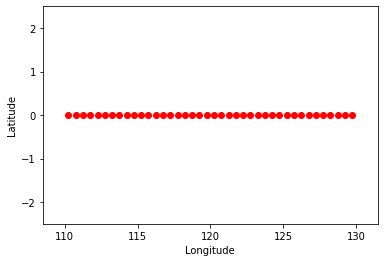

In [33]:
# 台站分布
plt.figure(1)
for i in range(Nst):
    plt.scatter(pos_st[i][2],pos_st[i][1],c='r',marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([lon1-1.5,lon2+1.5])
plt.ylim([lat1-1.5,lat2+1.5])


(-2.5, 2.5)

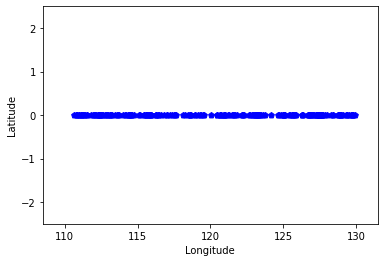

In [34]:
# 地震分布
plt.figure(2)
for i in range(Nev_region):
    plt.scatter(pos_ev_region[i][2],pos_ev_region[i][1],c='b',marker='p')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([lon1-1.5,lon2+1.5])
plt.ylim([lat1-1.5,lat2+1.5])


(93.75424024443853, 47.74214627658114, 90.0)
(91.74147058170392, 43.10606311626317, 270.0)
(28.519975785125162, 72.24495483877948, 90.0)
(99.8767124683807, 51.23861255736139, 90.0)
(29.960132387638367, 51.93135515946566, 270.0)
(63.20184963246517, 62.252792398477006, 270.0)
(25.90818571587431, 79.89381975746234, 90.0)
(60.869382359315146, 47.31946037861752, 270.0)
(58.76663282089372, 42.948550467077396, 270.0)
(12.108262720166383, 69.16694569680054, 90.0)
(46.00751259206518, 76.3915984958269, 270.0)
(10.170098357139967, 45.518927573483666, 270.0)
(89.79967671929133, 55.24970913034874, 90.0)
(31.693028518129445, 46.3626290086637, 90.0)
(93.75025622172483, 51.14523178278323, 270.0)
(51.259680088140676, 73.54150713960807, 90.0)
(86.11028572151156, 52.07812140684447, 90.0)
(10.66109955772044, 71.0593578794778, 90.0)
(22.843331848633156, 63.39145866462279, 270.0)
(61.43688934548696, 56.890466705336365, 90.0)
(62.97234405157307, 61.7695087060994, 270.0)
(39.05312782429853, 65.51691056952171,

(-80.0, 80.0)

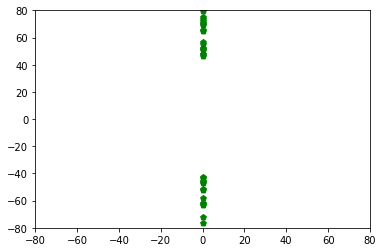

In [35]:
# 远震分布
plt.figure(3)
for i in range(Nev_tele):
    print(pos_ev_tele[i])
    x = pos_ev_tele[i][1]*math.cos(pos_ev_tele[i][2]/180*math.pi)
    y = pos_ev_tele[i][1]*math.sin(pos_ev_tele[i][2]/180*math.pi)
    plt.scatter(x,y,c='g',marker='p')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
plt.xlim([-80,80])
plt.ylim([-80,80])